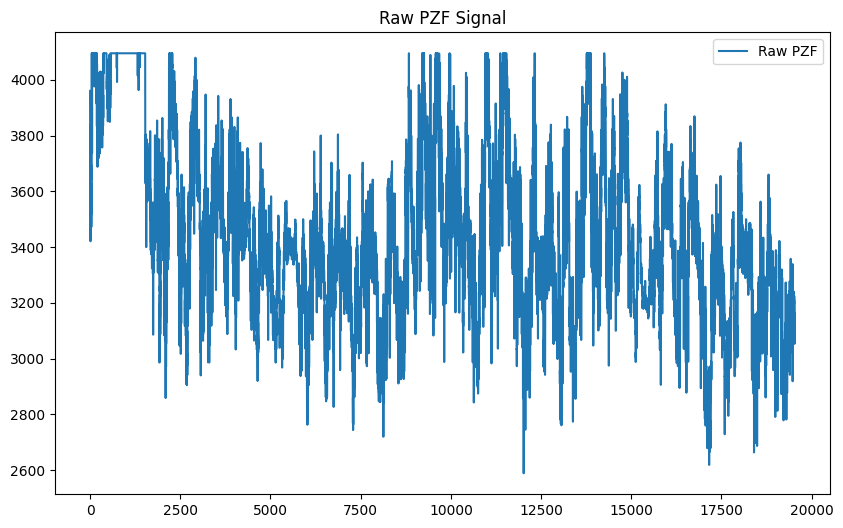

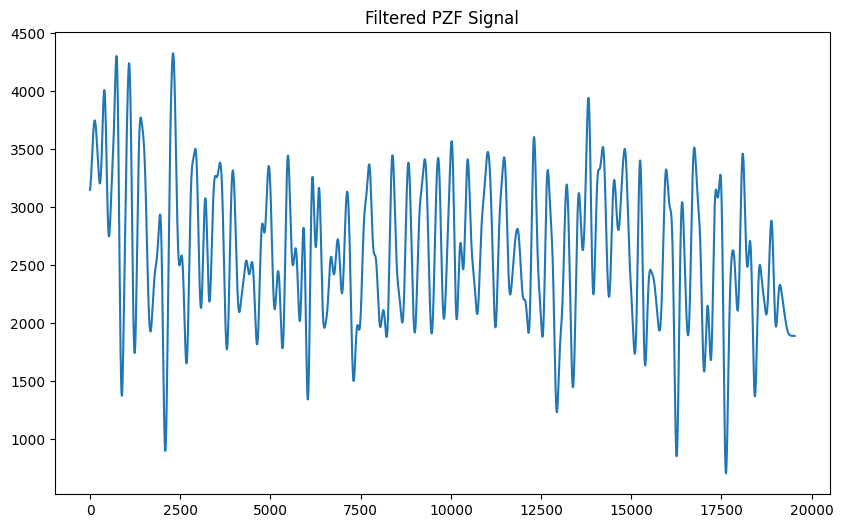

In [6]:
import signal

import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import HTML 
import plotly.offline as py
def process_signals(path):
    # Load data from the file
    try:
        data = np.loadtxt(path, delimiter=',')
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    # Extract signals from each column
    pzf = data[:, 0]
    acc_1 = data[:, 1]
    acc_2 = data[:, 2]
    acc_3 = data[:, 3]
    rot_1 = data[:, 4]
    rot_2 = data[:, 5]
    rot_3 = data[:, 6]

    # Process each signal using NeuroKit's rsp_process
    try:
        filtered_pzf, info_pzf = nk.rsp_process(pzf, sampling_rate=100)
        filtered_acc_1, info_acc_1 = nk.rsp_process(acc_1, sampling_rate=100)
        filtered_acc_2, info_acc_2 = nk.rsp_process(acc_2, sampling_rate=100)
        filtered_acc_3, info_acc_3 = nk.rsp_process(acc_3, sampling_rate=100)
        filtered_rot_1, info_rot_1 = nk.rsp_process(rot_1, sampling_rate=100)
        filtered_rot_2, info_rot_2 = nk.rsp_process(rot_2, sampling_rate=100)
        filtered_rot_3, info_rot_3 = nk.rsp_process(rot_3, sampling_rate=100)
    except Exception as e:
        print(f"Error processing signals: {e}")
        return
    

    # Plot the raw and filtered PZF signal
    plt.figure(figsize=(10, 6))
    plt.title("Raw PZF Signal")
    plt.plot(pzf, label='Raw PZF')
    plt.legend()
    
    plt.figure(figsize=(10, 6))
    [b,a] = signal.butter(9, 0.5, btype='lowpass',output='ba', fs=100)
    filtedData = signal.filtfilt(b, a, pzf)
    plt.plot(filtedData, label='Filtered PZF')
    
    plt.title("Filtered PZF Signal")
    fig_pzf = nk.rsp_plot(filtered_pzf, info_pzf,static=False)

    # Plot the accelerometer signals
    plt.figure(figsize=(12, 8))
    plt.title("Filtered Accelerometer Signals")
    plt.plot(filtered_acc_1["RSP_Clean"], label='Acc 1')
    plt.legend()

    plt.plot(filtered_acc_2["RSP_Clean"], label='Acc 2')
    plt.legend()

    plt.plot(filtered_acc_3["RSP_Clean"], label='Acc 3')
    plt.legend()

    # Plot the rotational signals
    plt.figure(figsize=(12, 8))
    plt.title("Filtered Rotational Signals")
    plt.plot(filtered_rot_1["RSP_Clean"], label='Rot 1')
    plt.legend()

    plt.plot(filtered_rot_2["RSP_Clean"], label='Rot 2')
    plt.legend()

    plt.plot(filtered_rot_3["RSP_Clean"], label='Rot 3')
    plt.legend()
    plt.tight_layout()
    # Show all plots
    plt.show()
    
    
    py.plot(fig_pzf, filename='pzf.html')
    py.plot(fig_pzf, filename='pzf_clean.html')
# Usage example
# process_signals("path/to/your/file.txt")
if __name__ == '__main__':
    process_signals("../../data/wjc.txt")